### Exercise 1: Explore the boston dataset
- Look at the heatmap from our previous exploration and choose two features you want to work with. 
- Import the libraries and data you need. 
- Feel free to play around with the data!
- Load the dataset in a pandas dataframe, then select the two columns of your choice and assign them to a new dataframe
- Add `boston.target` as last column to your new dataframe, and assign it to the column name 'MEDV'
- Make a heatmap with your new dataframe to check if the results are like before

*You are allowed to google or ask for help at any time!*

<img src="resources/heatmap_boston.png">


     LSTAT     RM  MEDV
501   9.67  6.593  22.4
502   9.08  6.120  20.6
503   5.64  6.976  23.9
504   6.48  6.794  22.0
505   7.88  6.030  11.9

 (506, 3) 
 (506, 13)


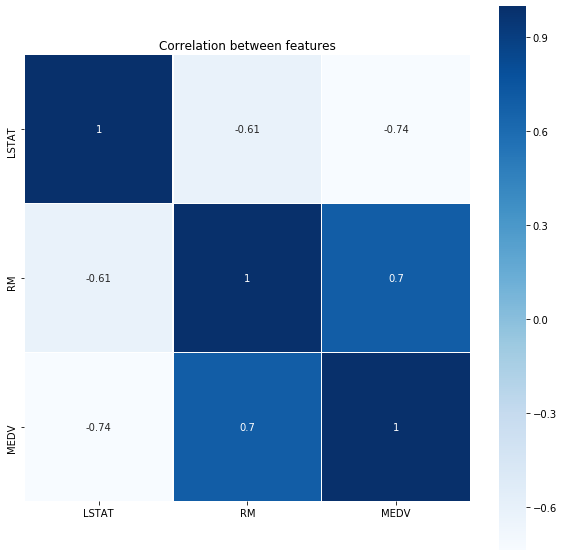

In [2]:
# solution

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

boston = load_boston()
bos1 = pd.DataFrame(boston.data, columns=boston.feature_names)
#bos2 = pd.DataFrame(bos1, columns=['LSTAT', 'RM'])
#bos2 = bos1[['LSTAT', 'RM']]
bos2 = bos1.loc[:, ['LSTAT', 'RM']]


bos2['MEDV'] = boston.target

print(bos2.tail())
print("\n", bos2.shape, "\n", bos1.shape)

corr=bos2.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, linewidths=0.01,
            square=True,annot=True,cmap='Blues',linecolor="white")
plt.title('Correlation between features');



### Exercise 2: Train a linear regression model with your data
- Import the sklearn classes you need
- Prepare your data for training and train your model
- Check how good (or bad?) the model scored

- *Bonus*: Drop another column and instantiate a second regression object (with only one feature). Visualize your prediction (you will need matplotlib for that: Useful functions are `scatter()` and `plot()`)

In [3]:
# solution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

x = bos2.drop(columns='MEDV') 
y = bos2['MEDV'] 

x2 = bos2.drop(columns=['RM', 'MEDV'])

lr = LinearRegression()
lr2 = LinearRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.18, random_state=42)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y, test_size=0.18, random_state=42)


lr.fit(x_train, y_train)
lr2.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print(lr.score(x_train, y_train), lr2.score(x_train2, y_train2))

0.6219837173767195 0.5280816797097219


In [15]:
print(lr.score(x_test, y_test), lr2.score(x_test2, y_test2))

0.7222627539681498 0.6222974690694044


In [6]:
lr.coef_

array([-0.65443129,  4.96427324])

In [7]:
lr.intercept_

-0.315705581741927

In [8]:
y_pred = lr2.predict(x_test2)

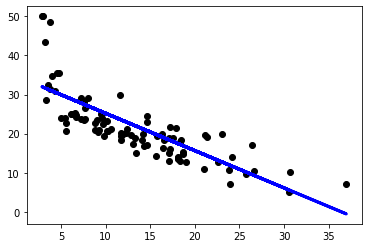

0.6222974690694044

In [9]:
plt.scatter(x_test2, y_test2, color='black')
plt.plot(x_test2, y_pred, color='blue', linewidth=3)
plt.show()
lr2.score(x_test2, y_test2)

### Exercise 3: Optimize your model 
- Try to optimize your model, you can use Lasso and Ridge Regression and polynomial features
